## Draw Maps for NRW
author: Shanshan Wang\
email: shanshan.wang@uni-due.de\
Feb. 30, 2024

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import csv
import matplotlib.colors
from IPython.display import clear_output

In [4]:
popden=pd.read_csv('/Volumes/SD/data/Germany/population_density/G-2021-AI002-1-5--AI0201--2023-05-09.csv',
                  sep=';',header=2)
popden_nrw=popden[(popden['schluessel']>=5000000) & (popden['schluessel']<6000000)]
popden_nrw.reset_index(drop=True, inplace=True)
popden_nrw.rename(columns={'regionaleinheit': 'name','wert':'pop_den'},inplace=True)
popden_nrw.drop(columns=['schluessel'],inplace=True)

/Users/working/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/working/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
n2=['Langenfeld (Rheinland)','Sundern','Eslohe','Stolberg','Gronau','Leichlingen','Menden']
n1=['Langenfeld (Rhld.)','Sundern (Sauerland)','Eslohe (Sauerland)','Stolberg (Rhld.)','Gronau (Westf.)','Leichlingen (Rhld.)','Menden (Sauerland)']
popden_nrw.replace({n1[0]: n2[0], n1[1]: n2[1], n1[2]: n2[2], n1[3]: n2[3], 
                    n1[4]: n2[4], n1[5]: n2[5], n1[6]: n2[6]},inplace=True)

/Users/working/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Draw NRW motorway network

In [6]:
# boundary data from openstreetmap
nrw=gpd.read_file('nrw_admin_level8_boundary.shp')
# load motorway network
mw=gpd.read_file("/Users/working/Documents/program/MATLAB/TrafficBehavior/NRW/sectioninfo/highway_motorway_North Rhine-Westphalia_lines.geojson")
mw_used=mw[['highway','ref','geometry']]

In [8]:
cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["white","#7F8C8D"])

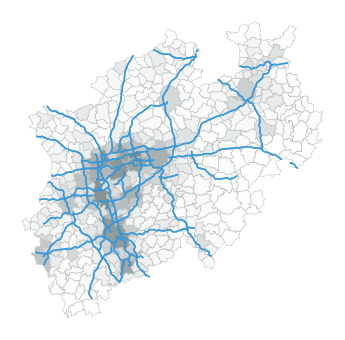

In [9]:
# compare the above map with the real motorway network
fig, ax = plt.subplots(figsize = (6,6))
nrw.plot(column='pop_den', edgecolor='silver', linewidth=0.5, zorder=1, ax=ax, cmap=cmap,legend=False,
         legend_kwds={'label': "Population density [$km^{-2}$]",'shrink': 0.3})
mw_used.plot(color='#3498DB',linewidth=1.5, ax=ax, zorder=2)
#for idx, row in nrw68.iterrows():
#    plt.annotate(text=row['name'], xy=row['coords'], horizontalalignment='center', color='black',size=8, zorder=3)
ax.set_axis_off()
#plt.savefig('motorway_network.png',dpi=300)

### Draw NRW region network

In [13]:
# load information of region connections
regioninfo=pd.read_csv('regioninfo.csv')
region_connect=pd.read_csv('region_connect.csv',header=None,names=regioninfo.name.to_list(),index_col=None)
region_connect=region_connect.rename(index=regioninfo.name)
region_neighbour=pd.read_csv('region_neighbour.csv',header=None,names=regioninfo.name.to_list(),index_col=None)
region_neighbour=region_neighbour.rename(index=regioninfo.name)

In [14]:
regioninfo.head()

,name,coords,pop_den,lon,lat
0,Mülheim an der Ruhr,"(6.8783210590979165, 51.413748100063145)",1870.5,6.878321,51.413748
1,Herne,"(7.208453824076478, 51.53750397862417)",3045.9,7.208454,51.537504
2,Mönchengladbach,"(6.412031159083005, 51.16730516827524)",1531.1,6.412031,51.167305
3,Leverkusen,"(7.0152463348943055, 51.05304307632232)",2077.5,7.015246,51.053043
4,Remscheid,"(7.223845647027924, 51.18268889912161)",1499.9,7.223846,51.182689


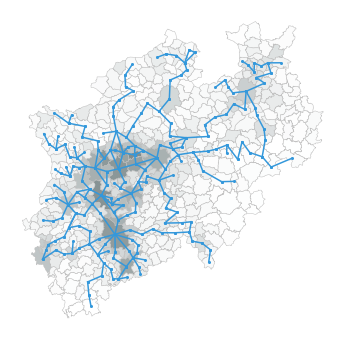

In [17]:
fig, ax = plt.subplots(figsize = (6,6))
nrw.plot(column='pop_den', edgecolor='silver', linewidth=0.5, zorder=1, ax=ax, cmap=cmap,legend=False,
         legend_kwds={'label': "Population density [$km^{-2}$]",'shrink': 0.3})
for ind1, row1 in regioninfo.iterrows():
    for ind2, row2 in regioninfo.iterrows():
        if region_connect.iloc[ind1,ind2]==1 and ind1<=ind2:
            xpoints=np.array([regioninfo.lon[ind1], regioninfo.lon[ind2]])
            ypoints=np.array([regioninfo.lat[ind1], regioninfo.lat[ind2]])
            plt.plot([row1['lon'],row2['lon']], [row1['lat'],row2['lat']],'o-',color='#3498DB',  
                      linewidth=1.5, markersize=2, zorder=2)
ax.set_axis_off()
#plt.savefig('region_network.png',dpi=300)

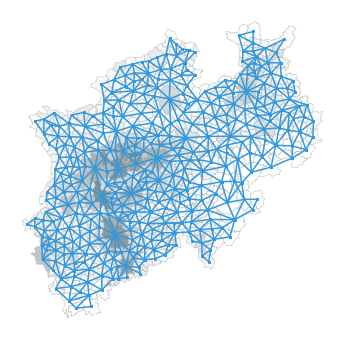

In [18]:
fig, ax = plt.subplots(figsize = (6,6))
# connect neighbouring regions in map
for ind1, row1 in regioninfo.iterrows():
    for ind2, row2 in regioninfo.iterrows():
        if region_neighbour.loc[row1['name'],row2['name']]==1 and ind1<=ind2:
            plt.plot([row1['lon'],row2['lon']], [row1['lat'],row2['lat']],'o-',color='#3498DB',
                      linewidth=1.5, markersize=2, zorder=3)
# draw boundaries of regions  ,legend=True
nrw.plot(column='pop_den', edgecolor='silver', linewidth=0.5, zorder=1, ax=ax, cmap=cmap,legend=False,
         legend_kwds={'label': "Population density [$km^{-2}$]",'shrink': 0.3})
ax.set_axis_off()
#plt.savefig('neighbour_connect.png',dpi=300)